In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_csv('credit_score_cleaned_train.csv', low_memory=False)
raw.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'credit_history_age',
       'total_emi_per_month', 'num_bank_accounts', 'num_credit_card',
       'interest_rate', 'num_of_loan', 'type_of_loan', 'delay_from_due_date',
       'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'payment_of_min_amount',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

In [3]:
# Drop array type 
np.unique(raw['type_of_loan'])

array(["['Auto Loan', 'Auto Loan', 'Auto Loan', 'Auto Loan', 'Credit-Builder Loan', 'Credit-Builder Loan', 'Mortgage Loan', 'Personal Loan']",
       "['Auto Loan', 'Auto Loan', 'Auto Loan', 'Auto Loan', 'Student Loan', 'Student Loan']",
       "['Auto Loan', 'Auto Loan', 'Auto Loan', 'Credit-Builder Loan', 'Payday Loan', 'Not Specified', 'Payday Loan', 'Student Loan', 'Debt Consolidation Loan']",
       ..., "['Student Loan', 'Student Loan', 'Student Loan']",
       "['Student Loan', 'Student Loan']", "['Student Loan']"],
      dtype=object)

In [ ]:
# Drop irrelevant columns
raw = raw.dropna()
raw = raw.drop(['id', 'customer_id', 'name', 'ssn', 'type_of_loan'], axis='columns')
raw.dtypes

month                        object
age                           int64
occupation                   object
annual_income               float64
monthly_inhand_salary       float64
credit_history_age            int64
total_emi_per_month         float64
num_bank_accounts             int64
num_credit_card               int64
interest_rate                 int64
num_of_loan                   int64
delay_from_due_date           int64
num_of_delayed_payment        int64
changed_credit_limit        float64
num_credit_inquiries          int64
credit_mix                   object
outstanding_debt            float64
credit_utilization_ratio    float64
payment_of_min_amount        object
amount_invested_monthly     float64
payment_behaviour            object
monthly_balance             float64
credit_score                  int64
dtype: object

In [5]:
from itertools import chain

categorical = ['month', 'occupation', 'payment_behaviour']
ordinal = ['credit_mix', 'payment_of_min_amount']

for f in chain(categorical, ordinal):
    print(f'{f}: {*np.unique(raw[f]),}\n')

month: ('April', 'August', 'February', 'January', 'July', 'June', 'March', 'May')

occupation: ('Accountant', 'Architect', 'Developer', 'Doctor', 'Engineer', 'Entrepreneur', 'Journalist', 'Lawyer', 'Manager', 'Mechanic', 'Media_Manager', 'Musician', 'Scientist', 'Teacher', 'Writer')

payment_behaviour: ('High_spent_Large_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments')

credit_mix: ('Bad', 'Good', 'Standard')

payment_of_min_amount: ('No', 'Yes')



In [6]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

# Ignore categorical features for now
clean = raw.drop(categorical, axis='columns')

ordinal_encode = OrdinalEncoder(
    categories=[
        ['Bad', 'Standard', 'Good'],    # credit_mix
        ['No', 'Yes'],                  # payment_of_min_amount
    ]
)
clean[ordinal] = ordinal_encode.fit_transform(raw[ordinal])

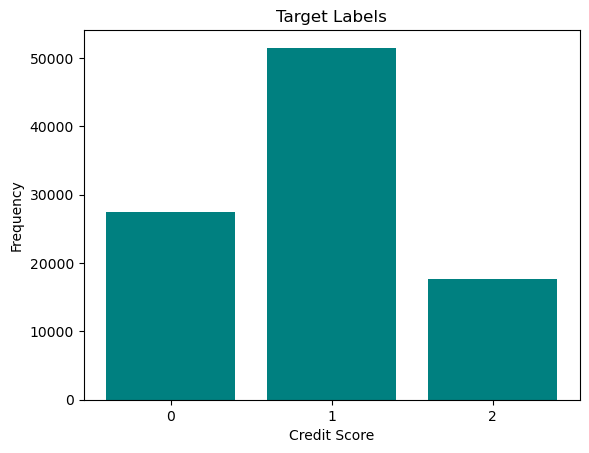

In [7]:
plt.bar(*np.unique(clean['credit_score'], return_counts=True), color='teal')
plt.title('Target Labels')
plt.xticks(range(3))
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

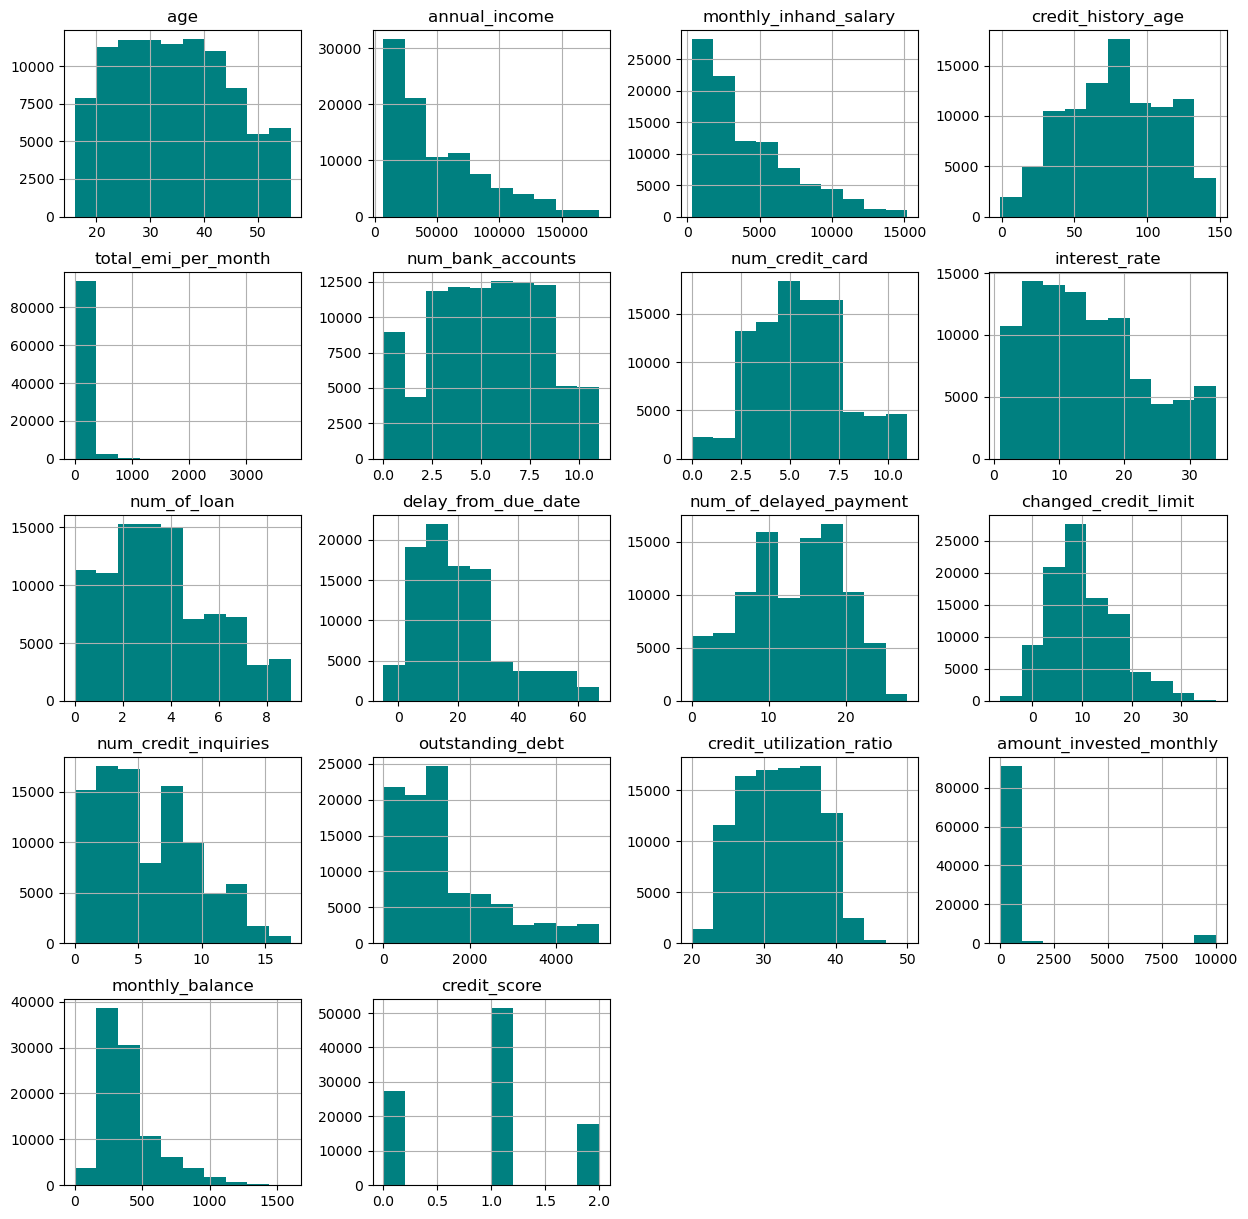

In [8]:
raw.hist(figsize=(15,15), color='teal')
plt.show()

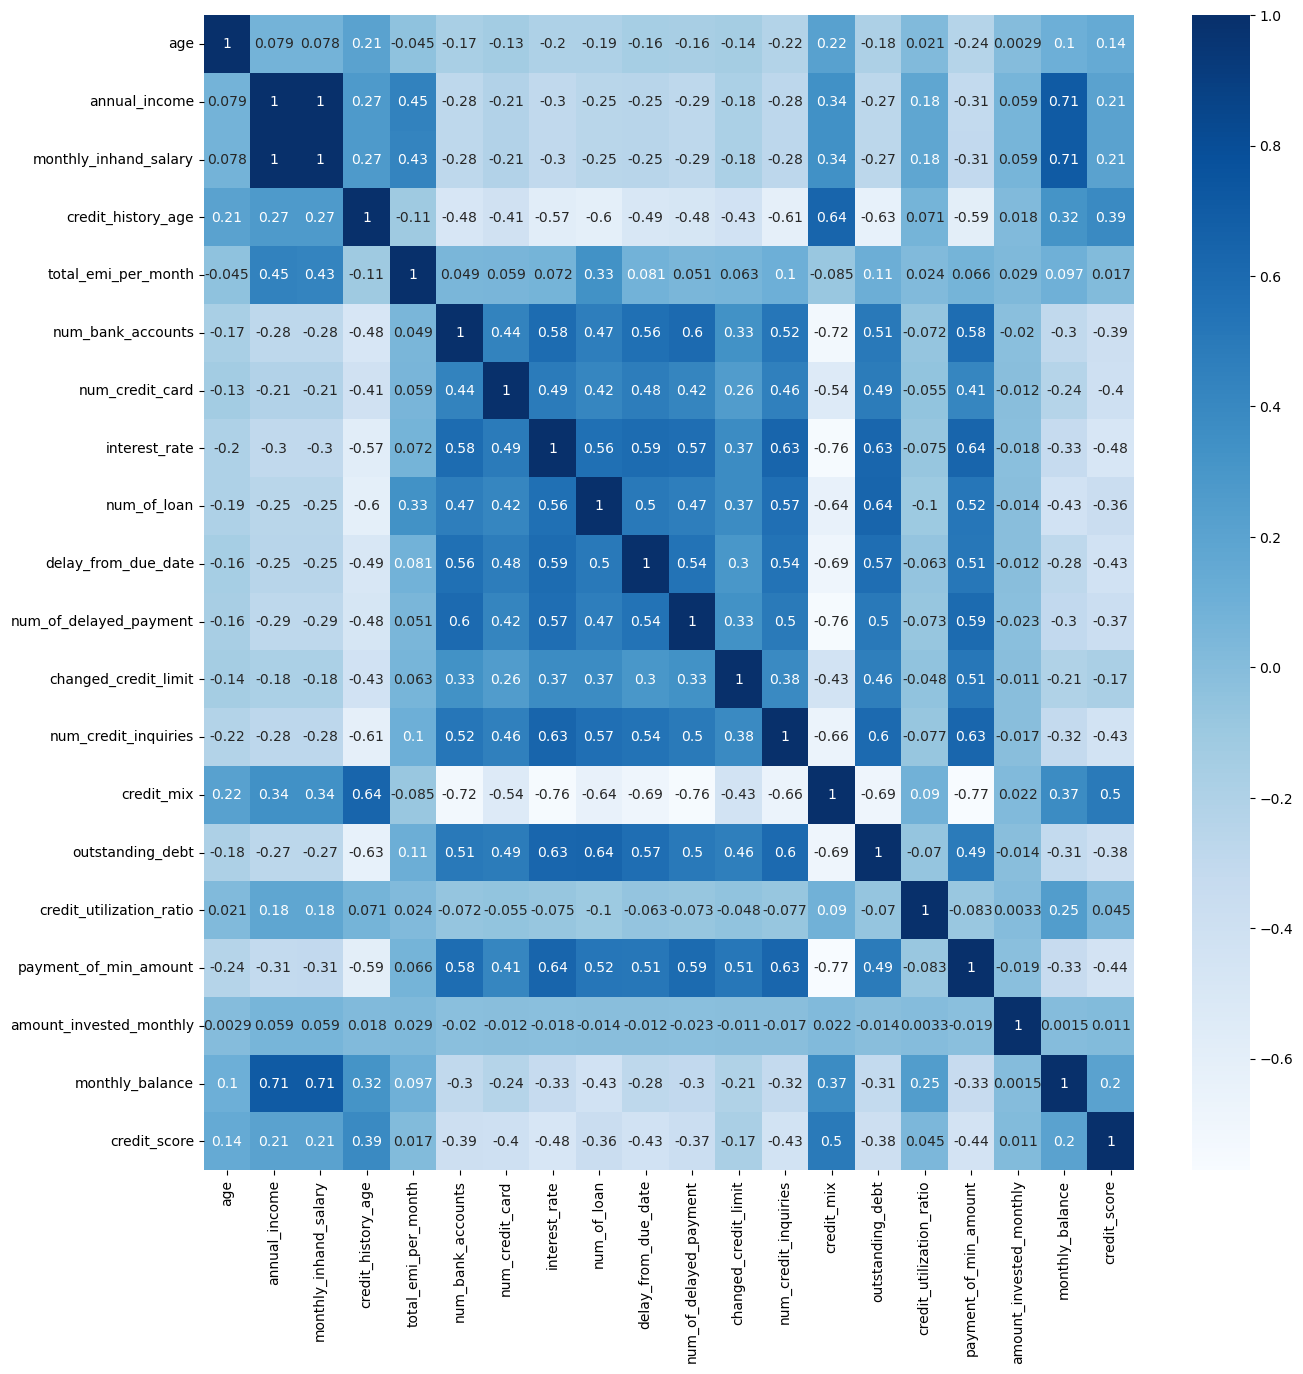

In [9]:
corr_matrix = clean.corr()

_, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, ax=ax)
plt.show()

In [10]:
# One-hot encode the categorical features and put them in a separate dataframe
one_hot_encode = OneHotEncoder(sparse_output=False)
one_hot_columns = pd.DataFrame(one_hot_encode.fit_transform(raw[categorical]), columns=one_hot_encode.get_feature_names_out())

clean_cat = pd.concat([clean, one_hot_columns], axis=1)
clean_cat.describe()

,age,annual_income,monthly_inhand_salary,credit_history_age,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,occupation_Musician,occupation_Scientist,occupation_Teacher,occupation_Writer,payment_behaviour_High_spent_Large_value_payments,payment_behaviour_High_spent_Medium_value_payments,payment_behaviour_High_spent_Small_value_payments,payment_behaviour_Low_spent_Large_value_payments,payment_behaviour_Low_spent_Medium_value_payments,payment_behaviour_Low_spent_Small_value_payments
count,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000,...,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000,96696.000000
mean,33.942448,50898.597475,4231.402393,78.471529,106.502641,5.319134,5.498211,14.347646,3.481344,20.806931,...,0.063788,0.067180,0.066270,0.063126,0.149313,0.190608,0.122549,0.113324,0.150120,0.274086
std,10.377550,38543.773796,3207.836030,33.291894,130.404213,2.597916,2.057083,8.708524,2.435098,14.785004,...,0.244375,0.250334,0.248754,0.243190,0.356399,0.392782,0.327921,0.316990,0.357191,0.446055
min,16.000000,7006.035000,303.645420,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,19480.040000,1634.720800,53.000000,28.636501,3.000000,4.000000,7.000000,2.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,37367.340000,3116.120850,78.000000,65.712006,5.000000,5.000000,13.000000,3.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,72245.760000,6016.623500,106.000000,145.756870,7.000000,7.000000,20.000000,5.000000,28.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,56.000000,179987.280000,15204.634000,147.000000,3776.000000,11.000000,11.000000,34.000000,9.000000,67.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


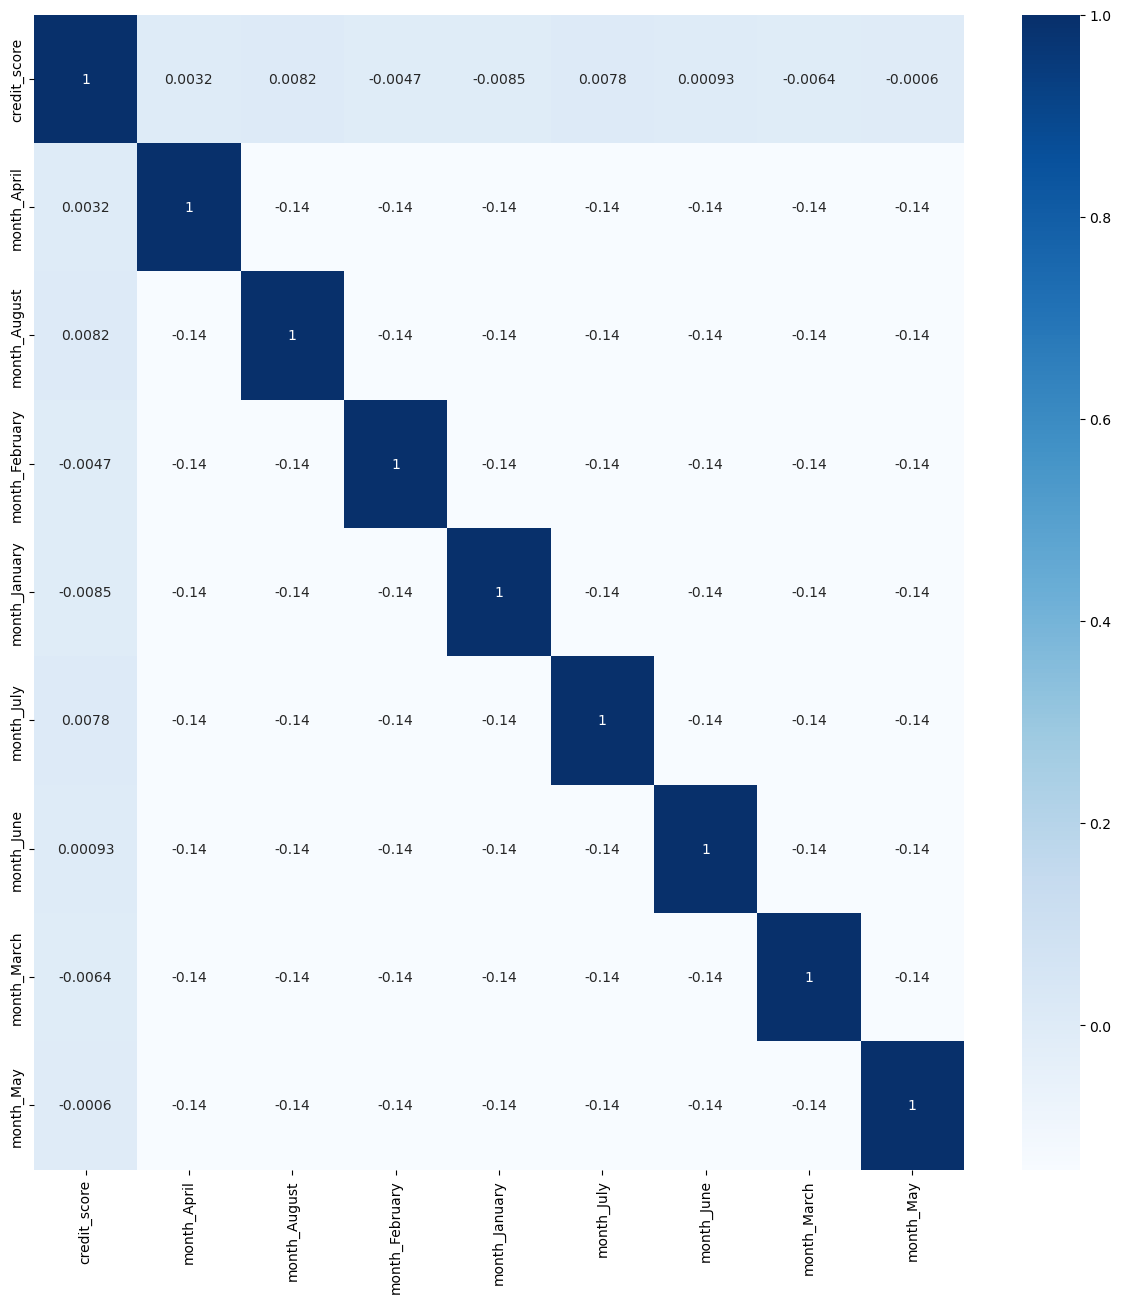

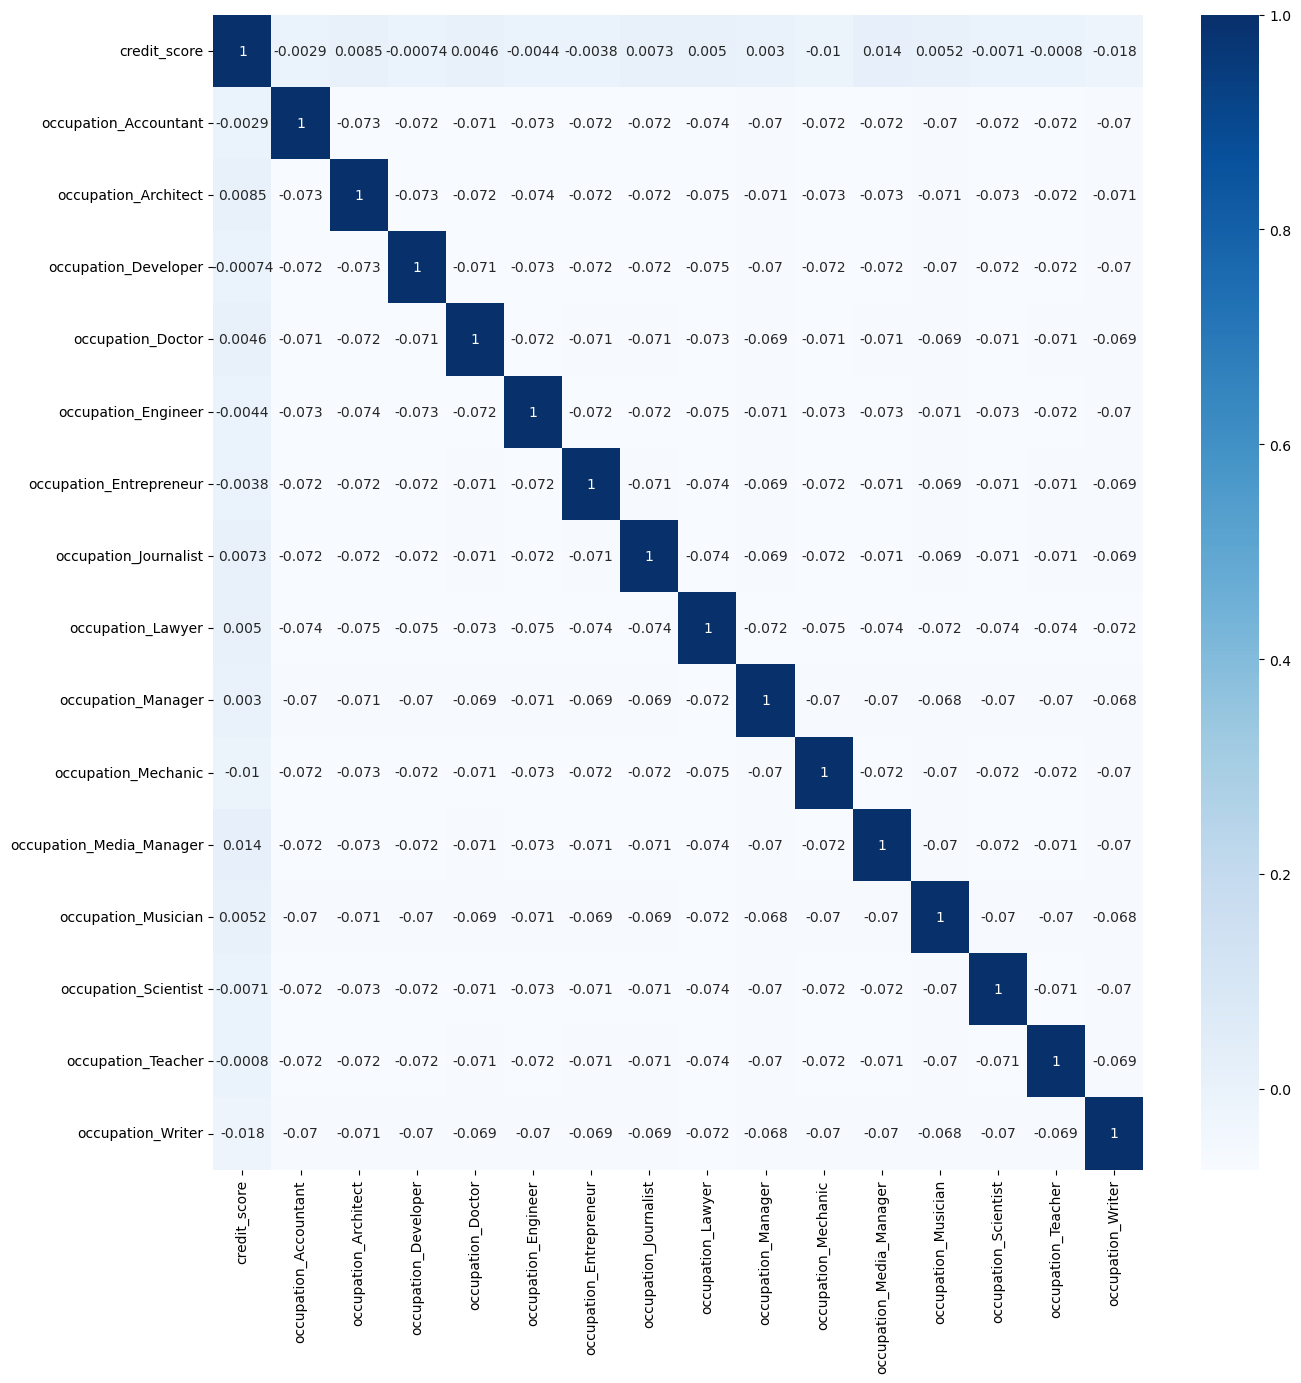

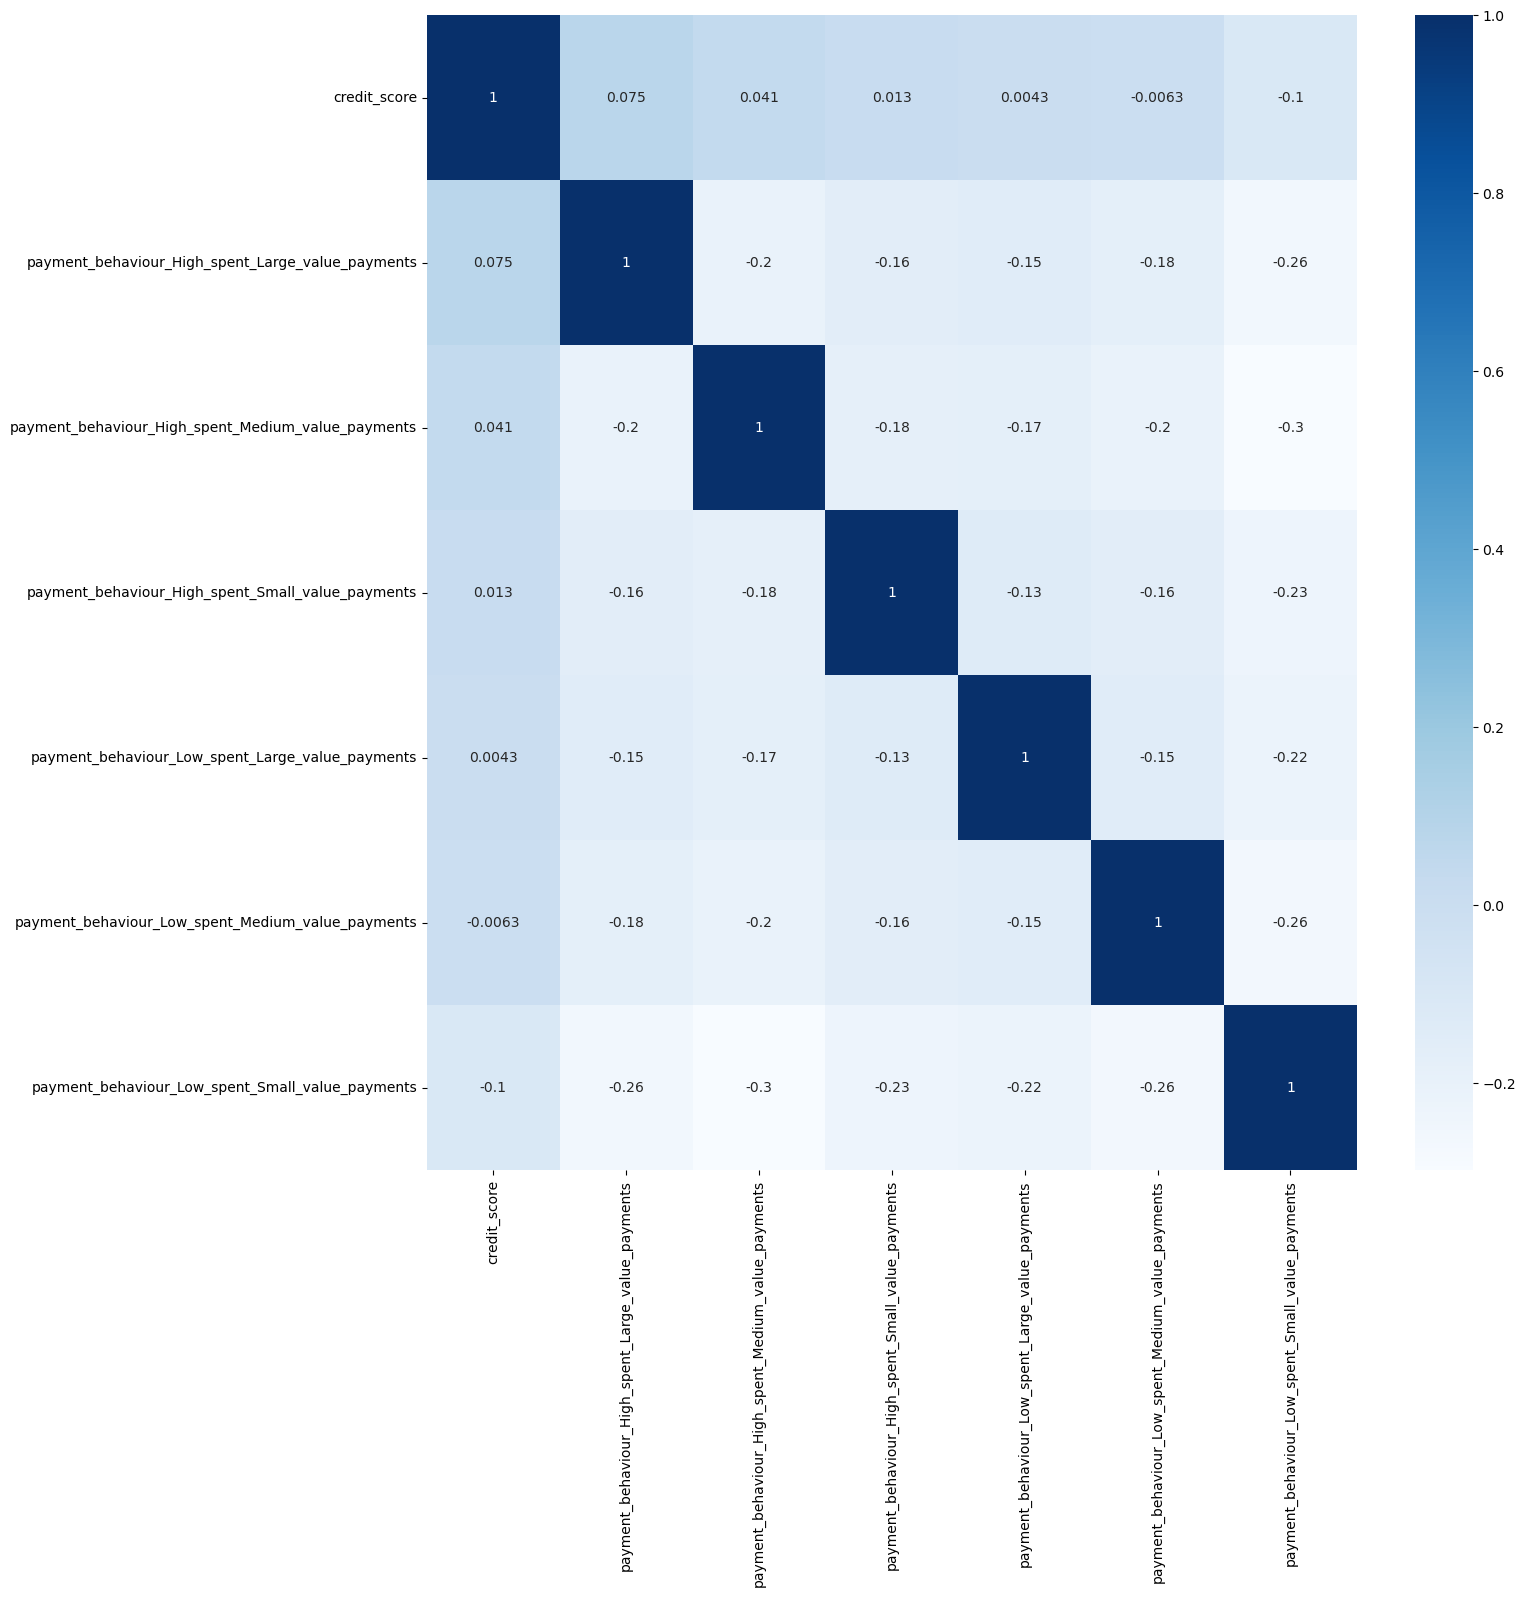

In [11]:
# Plot the correlation matrix of the categorical features and credit score
for feature in categorical:
    frame = clean_cat.loc[:, clean_cat.columns.str.startswith((feature+'_', 'credit_score'))]
    
    corr_matrix = frame.corr()
    _, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(corr_matrix, cmap='Blues', annot=True, ax=ax)
    plt.show()

In [12]:
from sklearn.model_selection import train_test_split

def normalize(df : pd.DataFrame):
    scaler = MinMaxScaler()
    features = df[df.columns.drop(['credit_score', 'monthly_inhand_salary'])]
    target = df['credit_score']

    X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2)

    # Normalize based only on the training data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    print(f'{X_train.shape}  {X_test.shape}')
    return X_train, X_test, Y_train, Y_test 

X_train, X_test, Y_train, Y_test = normalize(clean)

(77356, 18)  (19340, 18)


### Logistic Regression (No Categorical Features)

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

              precision    recall  f1-score   support

           0       0.68      0.51      0.58      5483
           1       0.69      0.75      0.72     10299
           2       0.57      0.63      0.60      3558

    accuracy                           0.66     19340
   macro avg       0.64      0.63      0.63     19340
weighted avg       0.66      0.66      0.66     19340



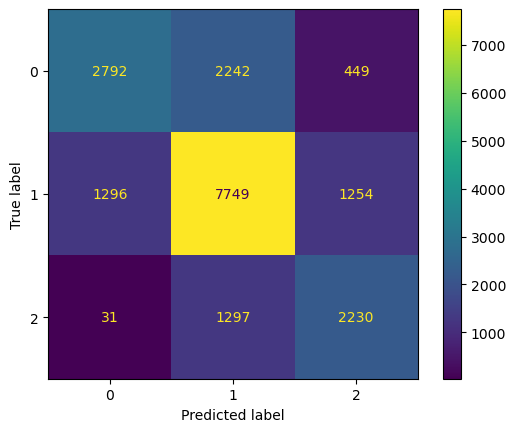

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred)
print(classification_report(Y_test,Y_pred))

### Artificial Neural Network (No Categorical Features)

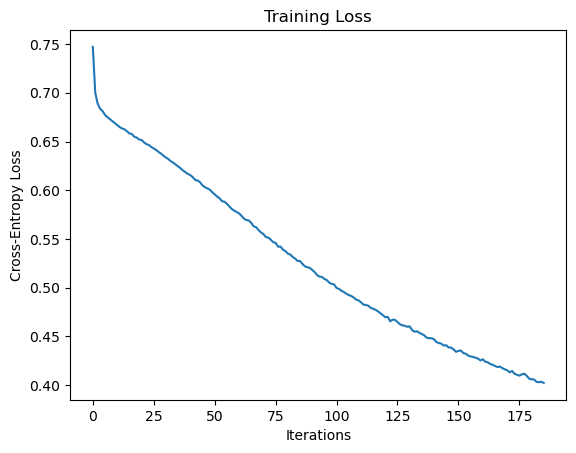

In [15]:
from sklearn.neural_network import MLPClassifier

# Tuning hyperparameters on a validation set
mlp = MLPClassifier(
    hidden_layer_sizes=[128, 256], 
    max_iter=500, solver='adam',
    learning_rate='constant',
    learning_rate_init=0.001,
    validation_fraction=0.2,
    n_iter_no_change=40,
    early_stopping=True)

mlp.fit(X_train, Y_train)
Y_pred = mlp.predict(X_test)

plt.plot(mlp.loss_curve_)
plt.title('Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Cross-Entropy Loss')
plt.show()

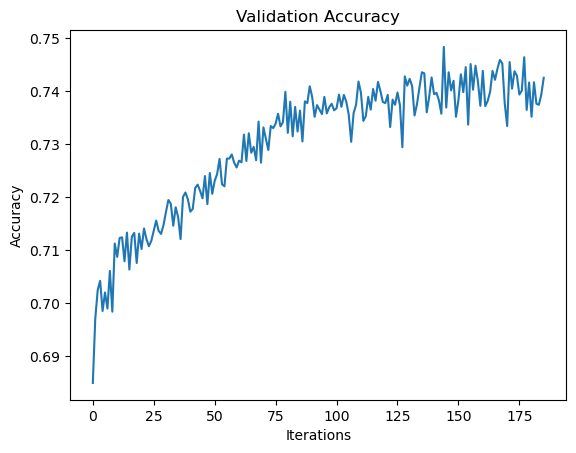

In [16]:
plt.plot(mlp.validation_scores_)
plt.title('Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

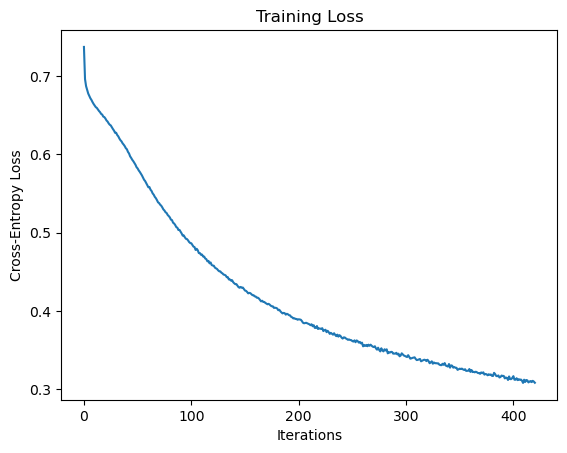

In [17]:
# Final hyperparameters
mlp = MLPClassifier(
    hidden_layer_sizes=[128, 256], 
    max_iter=750, solver='adam',
    learning_rate='constant',
    learning_rate_init=0.001)

mlp.fit(X_train, Y_train)
Y_pred = mlp.predict(X_test)

plt.plot(mlp.loss_curve_)
plt.title('Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Cross-Entropy Loss')
plt.show()

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      5483
           1       0.79      0.78      0.78     10299
           2       0.72      0.69      0.70      3558

    accuracy                           0.76     19340
   macro avg       0.75      0.75      0.75     19340
weighted avg       0.76      0.76      0.76     19340



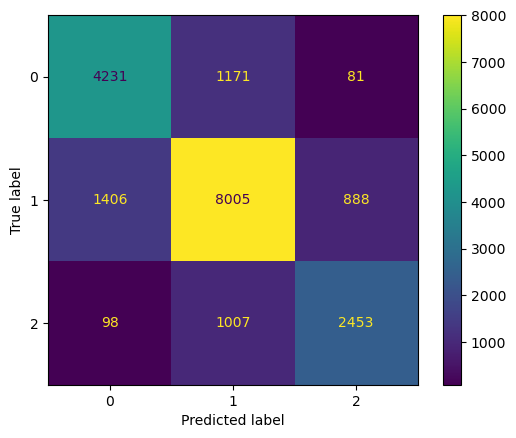

In [18]:
ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred)
print(classification_report(Y_test,Y_pred))

### Logistic Regression (Categorical Features)

In [19]:
X_train, X_test, Y_train, Y_test = normalize(clean_cat)

lr_cat = LogisticRegression(max_iter=500)
lr_cat.fit(X_train, Y_train)
Y_pred = lr_cat.predict(X_test)

(77356, 47)  (19340, 47)


              precision    recall  f1-score   support

           0       0.68      0.51      0.58      5523
           1       0.68      0.75      0.71     10241
           2       0.55      0.62      0.58      3576

    accuracy                           0.65     19340
   macro avg       0.64      0.62      0.63     19340
weighted avg       0.66      0.65      0.65     19340



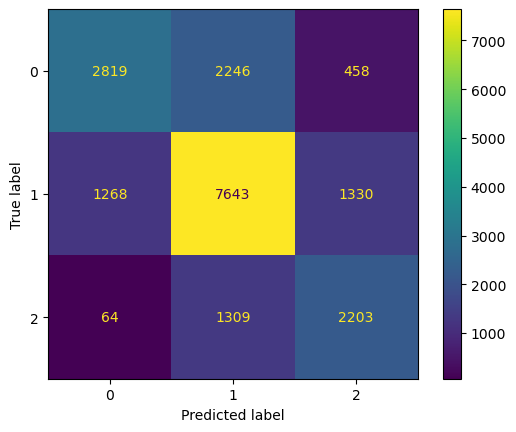

In [20]:
ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred)
print(classification_report(Y_test,Y_pred))

### Artificial Neural Network (Categorical Features)

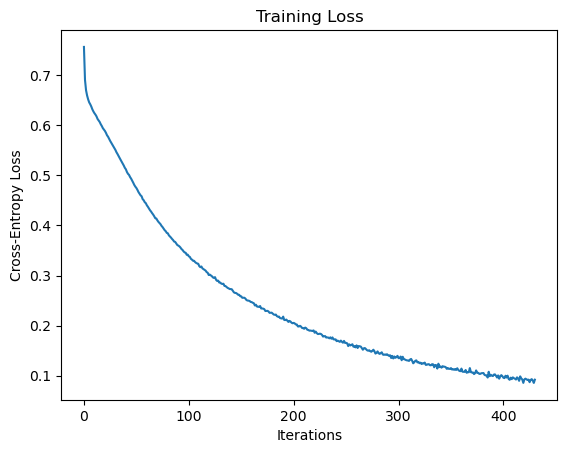

In [21]:
mlp_cat = MLPClassifier(
    hidden_layer_sizes=[128, 256], 
    max_iter=750, solver='adam',
    learning_rate='constant',
    learning_rate_init=0.001)

mlp_cat.fit(X_train, Y_train)
Y_pred = mlp_cat.predict(X_test)

plt.plot(mlp_cat.loss_curve_)
plt.title('Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Cross-Entropy Loss')
plt.show()

              precision    recall  f1-score   support

           0       0.65      0.64      0.65      5523
           1       0.72      0.72      0.72     10241
           2       0.59      0.61      0.60      3576

    accuracy                           0.68     19340
   macro avg       0.65      0.66      0.65     19340
weighted avg       0.68      0.68      0.68     19340



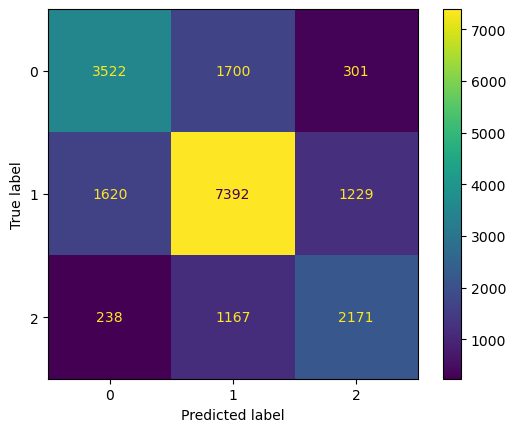

In [22]:
ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred)
print(classification_report(Y_test,Y_pred))